In [1]:
#3049
import pandas as pd
from sklearn.datasets import load_diabetes
dataset = pd.read_csv("diabetes.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [2]:
#3049
dataset.sample(5, random_state=101)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
766,1,126,60,0,0,30.1,0.349,47,1
748,3,187,70,22,200,36.4,0.408,36,1
42,7,106,92,18,0,22.7,0.235,48,0
485,0,135,68,42,250,42.3,0.365,24,1
543,4,84,90,23,56,39.5,0.159,25,0


In [3]:
#3049
X = dataset.drop(columns='Outcome')
y = dataset['Outcome']

In [4]:
#3049
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
#3049
from sklearn.ensemble import AdaBoostClassifier
 
# initialize and fit model on the training set
model = AdaBoostClassifier()
model.fit(X_train, y_train)
 
# predict category for the test inputs
y_test_predictions = model.predict(X_test) 

In [6]:
#3049
from sklearn.metrics import confusion_matrix
 
# Order of the input parameters is important: 
# first param is the actual output values
# second param is what our model predicted
conf_matrix = confusion_matrix(y_test, y_test_predictions)
 
conf_matrix

array([[127,  23],
       [ 39,  42]], dtype=int64)

In [7]:
#3049
from sklearn.metrics import accuracy_score
 
accuracy_score(y_test, y_test_predictions).round(2)

0.73

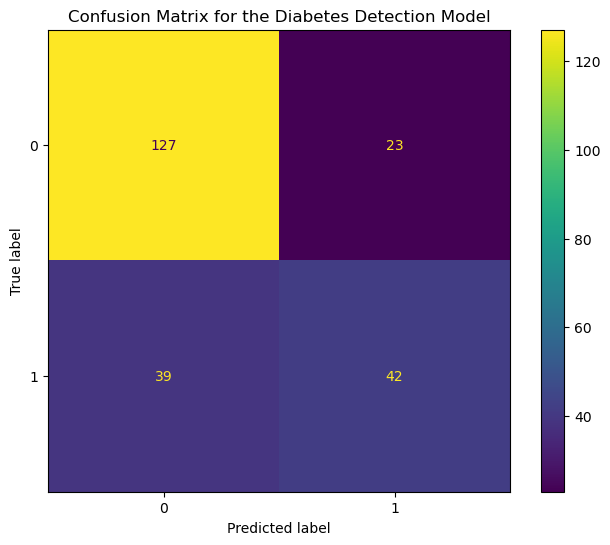

In [8]:
#3049
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
 
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
 
# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
 
# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Diabetes Detection Model')
 
# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);

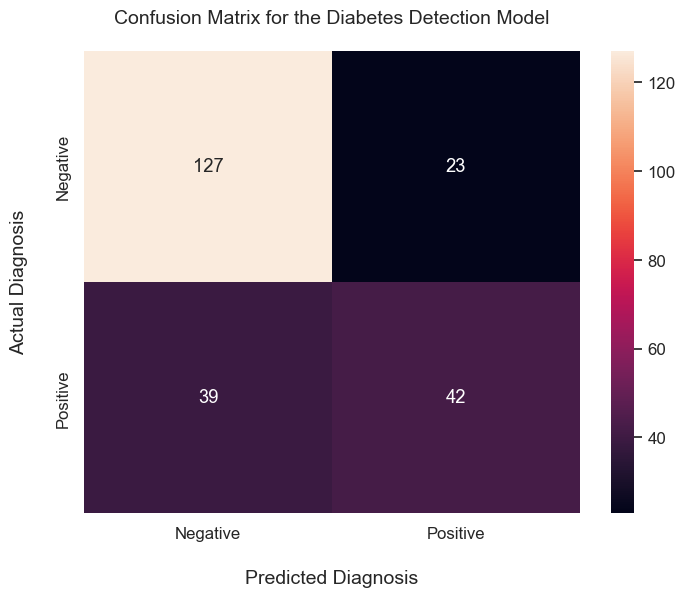

In [9]:
#3049
import seaborn as sns
 
# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)
 
# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format   
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers. 
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', )
 
# set x-axis label and ticks. 
ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
 
# set y-axis label and ticks
ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
 
# set plot title
ax.set_title("Confusion Matrix for the Diabetes Detection Model", fontsize=14, pad=20)
 
plt.show()
